In [45]:
import torch
import PIL
from torchvision import transforms
from matplotlib import pyplot as plt
from modules.datasets import MultiLabelDataset,ContrastiveDataset

In [46]:
multiLabelDataset = MultiLabelDataset("./Carparts")
len(multiLabelDataset)

27618

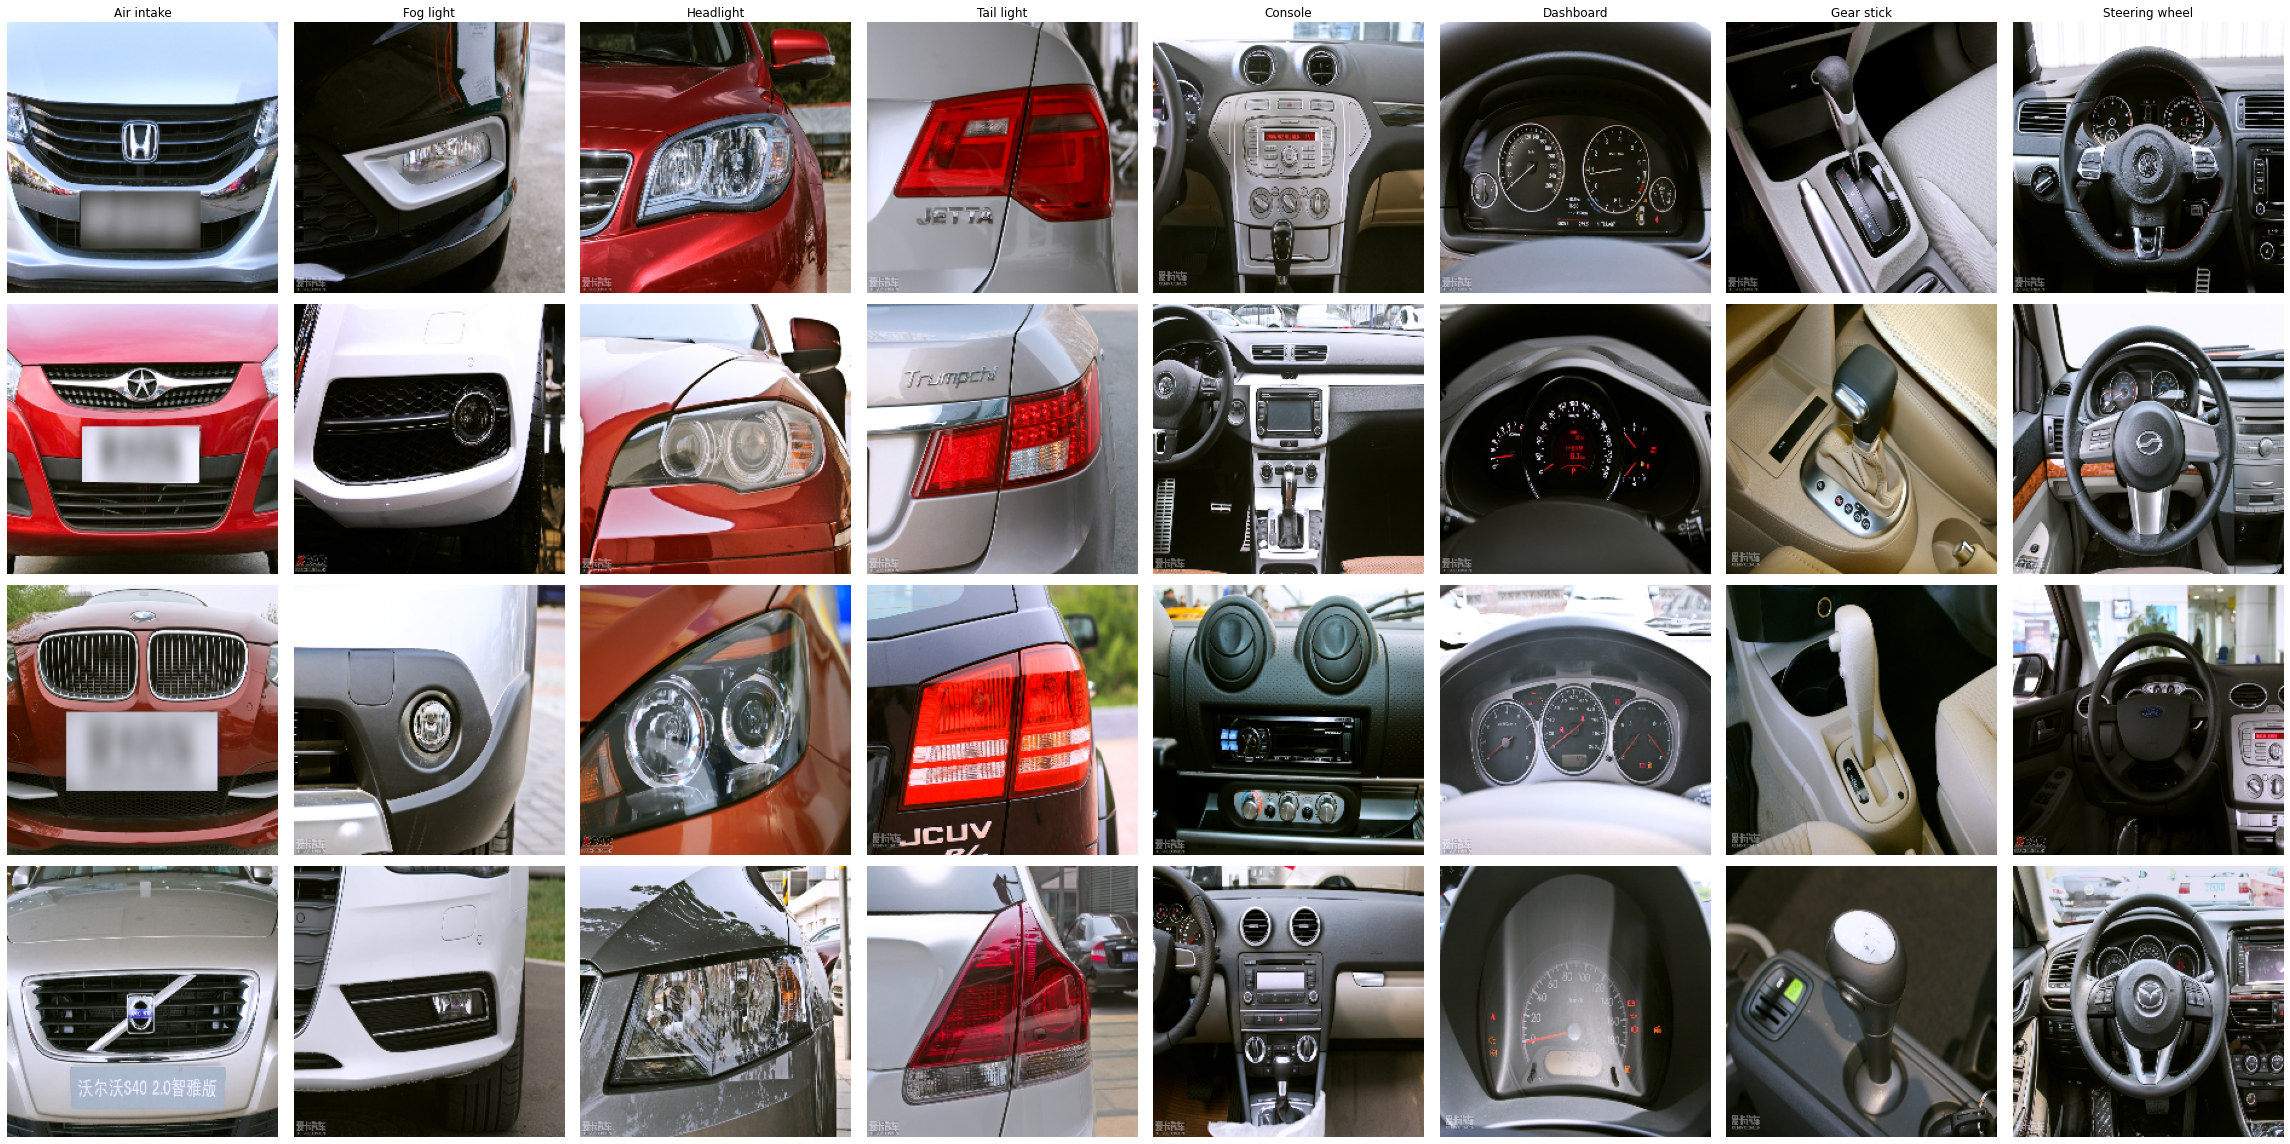

In [47]:
def inverse_transform(image:torch.Tensor):
    inv_normalize = transforms.Normalize(
        mean=[-0.485/0.229, -0.456/0.224, -0.406/0.255],
        std=[1/0.229, 1/0.224, 1/0.255]
    )
    return inv_normalize(image).numpy().transpose(1,2,0).clip(0,1)

rows = 4
columns = len(multiLabelDataset.datasets)
index = 1
plt.figure(figsize=(columns*4,rows*4))
for k in range(rows):
    for i,subDataset in enumerate(multiLabelDataset.datasets):
        
        plt.subplot(rows,columns,index)
        dataset = multiLabelDataset.datasets[subDataset]
        image = dataset[k][0]
        image = inverse_transform(image)
        plt.imshow(image)
        plt.axis('off')
        index += 1
        if k == 0:
            plt.title(subDataset)

   
plt.tight_layout() 
plt.show()